In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntSlider
from tqdm import tqdm_notebook
import seaborn as sns
import random

In [2]:
train_acl = pd.read_csv('data/train-acl.csv', header=None,
                       names=['Case', 'Abnormal'], 
                       dtype={'Case': str, 'Abnormal': np.int64})

train_acl.head()

,Case,Abnormal
0,0000,0
1,0001,1
2,0002,0
3,0003,0
4,0004,0


In [3]:
train_acl.describe()

,Abnormal
count,1130.000000
mean,0.184071
std,0.387714
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


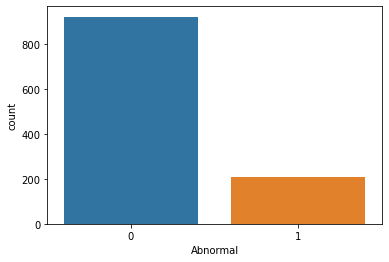

In [4]:
ax = sns.countplot(x="Abnormal", data=train_acl)
plt.show()

It seems we have quite a dataset imbalance, class 0 being the most represented. 

### First Look at the Images

In [5]:
case = '0032'

mri_coronal = np.load('data/train/coronal/'+case+'.npy')
mri_axial = np.load('data/train/axial/'+case+'.npy')
mri_sagittal = np.load('data/train/sagittal/'+case+'.npy')

print(f'MRI scan on coronal plane: {mri_coronal.shape}')
print(f'MRI scan on axial plane: {mri_axial.shape}')
print(f'MRI scan on sagittal plane: {mri_sagittal.shape}')

MRI scan on coronal plane: (31, 256, 256)
MRI scan on axial plane: (37, 256, 256)
MRI scan on sagittal plane: (34, 256, 256)


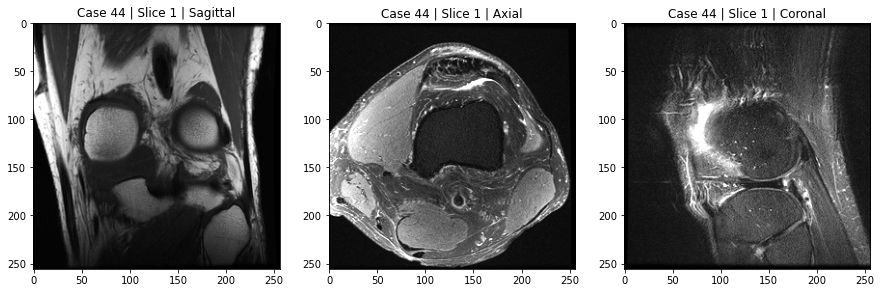

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
slice=random.choice(range(21)) 
ax1.imshow(mri_coronal[slice, :, :], 'gray');
ax1.set_title('Case 44 | Slice 1 | Sagittal');

ax2.imshow(mri_axial[slice, :, :], 'gray');
ax2.set_title('Case 44 | Slice 1 | Axial');

ax3.imshow(mri_sagittal[slice, :, :], 'gray');
ax3.set_title('Case 44 | Slice 1 | Coronal');